In [9]:
import numpy as np
from scipy.stats import beta
import matplotlib.pyplot as plt

In [46]:

n_trials = 20

# AB+ | A-
data =  [(1,1,1)] * (n_trials//2) +[(1,0,0)] * (n_trials//2)
# AB+ | B+
# data =  [(1,1,1)]  * (n_trials//2)  +[(0,1,1)]  * (n_trials//2 )
# A+ | AB+
# data =  [(1,0,1)]  * (n_trials//2)  +[(1,1,1)]  * (n_trials//2 )


In [25]:
# a--> b <--> non-a ou b

In [26]:
# Création de l'échantillon des valeurs
x = np.linspace(0, 1, 1000)

In [41]:
def simple_competition(data, alpha=10):
    plt.figure(figsize=(30,20))
    # H1 : A => C : non-A ou C
    H1 = ((0,0,0), (0,0,1), (0,1,0), (0,1,1), (1,0,1), (1,1,1)) 
    # H2 : B => C : non B ou C
    H2 = ((0,0,0), (0,0,1), (1,0,0), (1,0,1), (0,1,1), (1,1,1)) 
    beta_ = { 'H1':[1,1], 'H2':[1,1]}
    count = { 'H1':0, 'H2':0}
    mem_choice = []
    lik = {}
    dir = {}
    for i, obs in enumerate(data):
        n = i + 1
        ax = plt.subplot(5,5,i+1)
        lik['H1'] = int(tuple(obs) in H1)
        lik['H2'] = int(tuple(obs) in H2)
        #print(lik['H0'], lik['H1'], lik['H2'])
        dir['H1'] = (count['H1']+ alpha/2) / (n + alpha)
        dir['H2'] = (count['H2']+ alpha/2) / (n + alpha)
        z = lik['H1'] * dir['H1'] +  lik['H2'] * dir['H2']
        p = ((lik['H1'] * dir['H1']) / z,
             (lik['H2'] * dir['H2']) / z)
        choice = np.random.choice(['H1','H2'], p=p)
        count[choice] += 1
        print(p, choice)
        beta_['H1'][int(choice=='H1')] += 1
        beta_['H2'][int(choice=='H2')] += 1
        print(beta_)
        pdf_H1 = beta.pdf(x, beta_['H1'][1], beta_['H1'][0])
        pdf_H2 = beta.pdf(x, beta_['H2'][1], beta_['H2'][0])
        ax.plot(x, pdf_H1, label=r'H1: $A \rightarrow C$', color='tab:blue')
        ax.plot(x, pdf_H2, label=r'H2: $B \rightarrow C$', color='tab:green')
        #overlap_surface = np.minimum(pdf_H0, pdf_H1)
        #overlap_prob = np.trapz(np.minimum(pdf_H0, pdf_H1), x)
        #ax.fill_between(x, np.zeros_like(overlap_surface), overlap_surface, color='tab:red', alpha=.2)
        ax.set_title(f'Observation #{i+1}')#, overlap={overlap_prob:.2f}')
        ax.text(0.05,4.5,f'A={obs[0]}')
        ax.text(0.05,4.1,f'B={obs[1]}')
        ax.text(0.05,3.7,f'C={obs[2]}')
        ax.text(0.05,3.3,f'Choice={choice}')
        ax.set_ylim(0,5)
        ax.set_xlim(0,1)
        plt.legend(loc=1)
    return beta_, count

(0.5, 0.5) H1
{'H1': [1, 2], 'H2': [2, 1]}
(0.5454545454545454, 0.45454545454545453) H2
{'H1': [2, 2], 'H2': [2, 2]}
(0.5, 0.5) H1
{'H1': [2, 3], 'H2': [3, 2]}
(0.5384615384615384, 0.4615384615384615) H1
{'H1': [2, 4], 'H2': [4, 2]}
(0.5714285714285714, 0.4285714285714286) H2
{'H1': [3, 4], 'H2': [4, 3]}
(0.5333333333333333, 0.4666666666666667) H1
{'H1': [3, 5], 'H2': [5, 3]}
(0.5625, 0.4375) H1
{'H1': [3, 6], 'H2': [6, 3]}
(0.5882352941176471, 0.411764705882353) H1
{'H1': [3, 7], 'H2': [7, 3]}
(0.611111111111111, 0.38888888888888884) H1
{'H1': [3, 8], 'H2': [8, 3]}
(0.631578947368421, 0.3684210526315789) H2
{'H1': [4, 8], 'H2': [8, 4]}
(0.6, 0.4) H2
{'H1': [5, 8], 'H2': [8, 5]}
(0.5714285714285714, 0.4285714285714286) H1
{'H1': [5, 9], 'H2': [9, 5]}
(0.5909090909090908, 0.4090909090909091) H2
{'H1': [6, 9], 'H2': [9, 6]}
(0.5652173913043478, 0.4347826086956522) H2
{'H1': [7, 9], 'H2': [9, 7]}
(0.5416666666666667, 0.45833333333333337) H2
{'H1': [8, 9], 'H2': [9, 8]}
(0.52, 0.4800000000

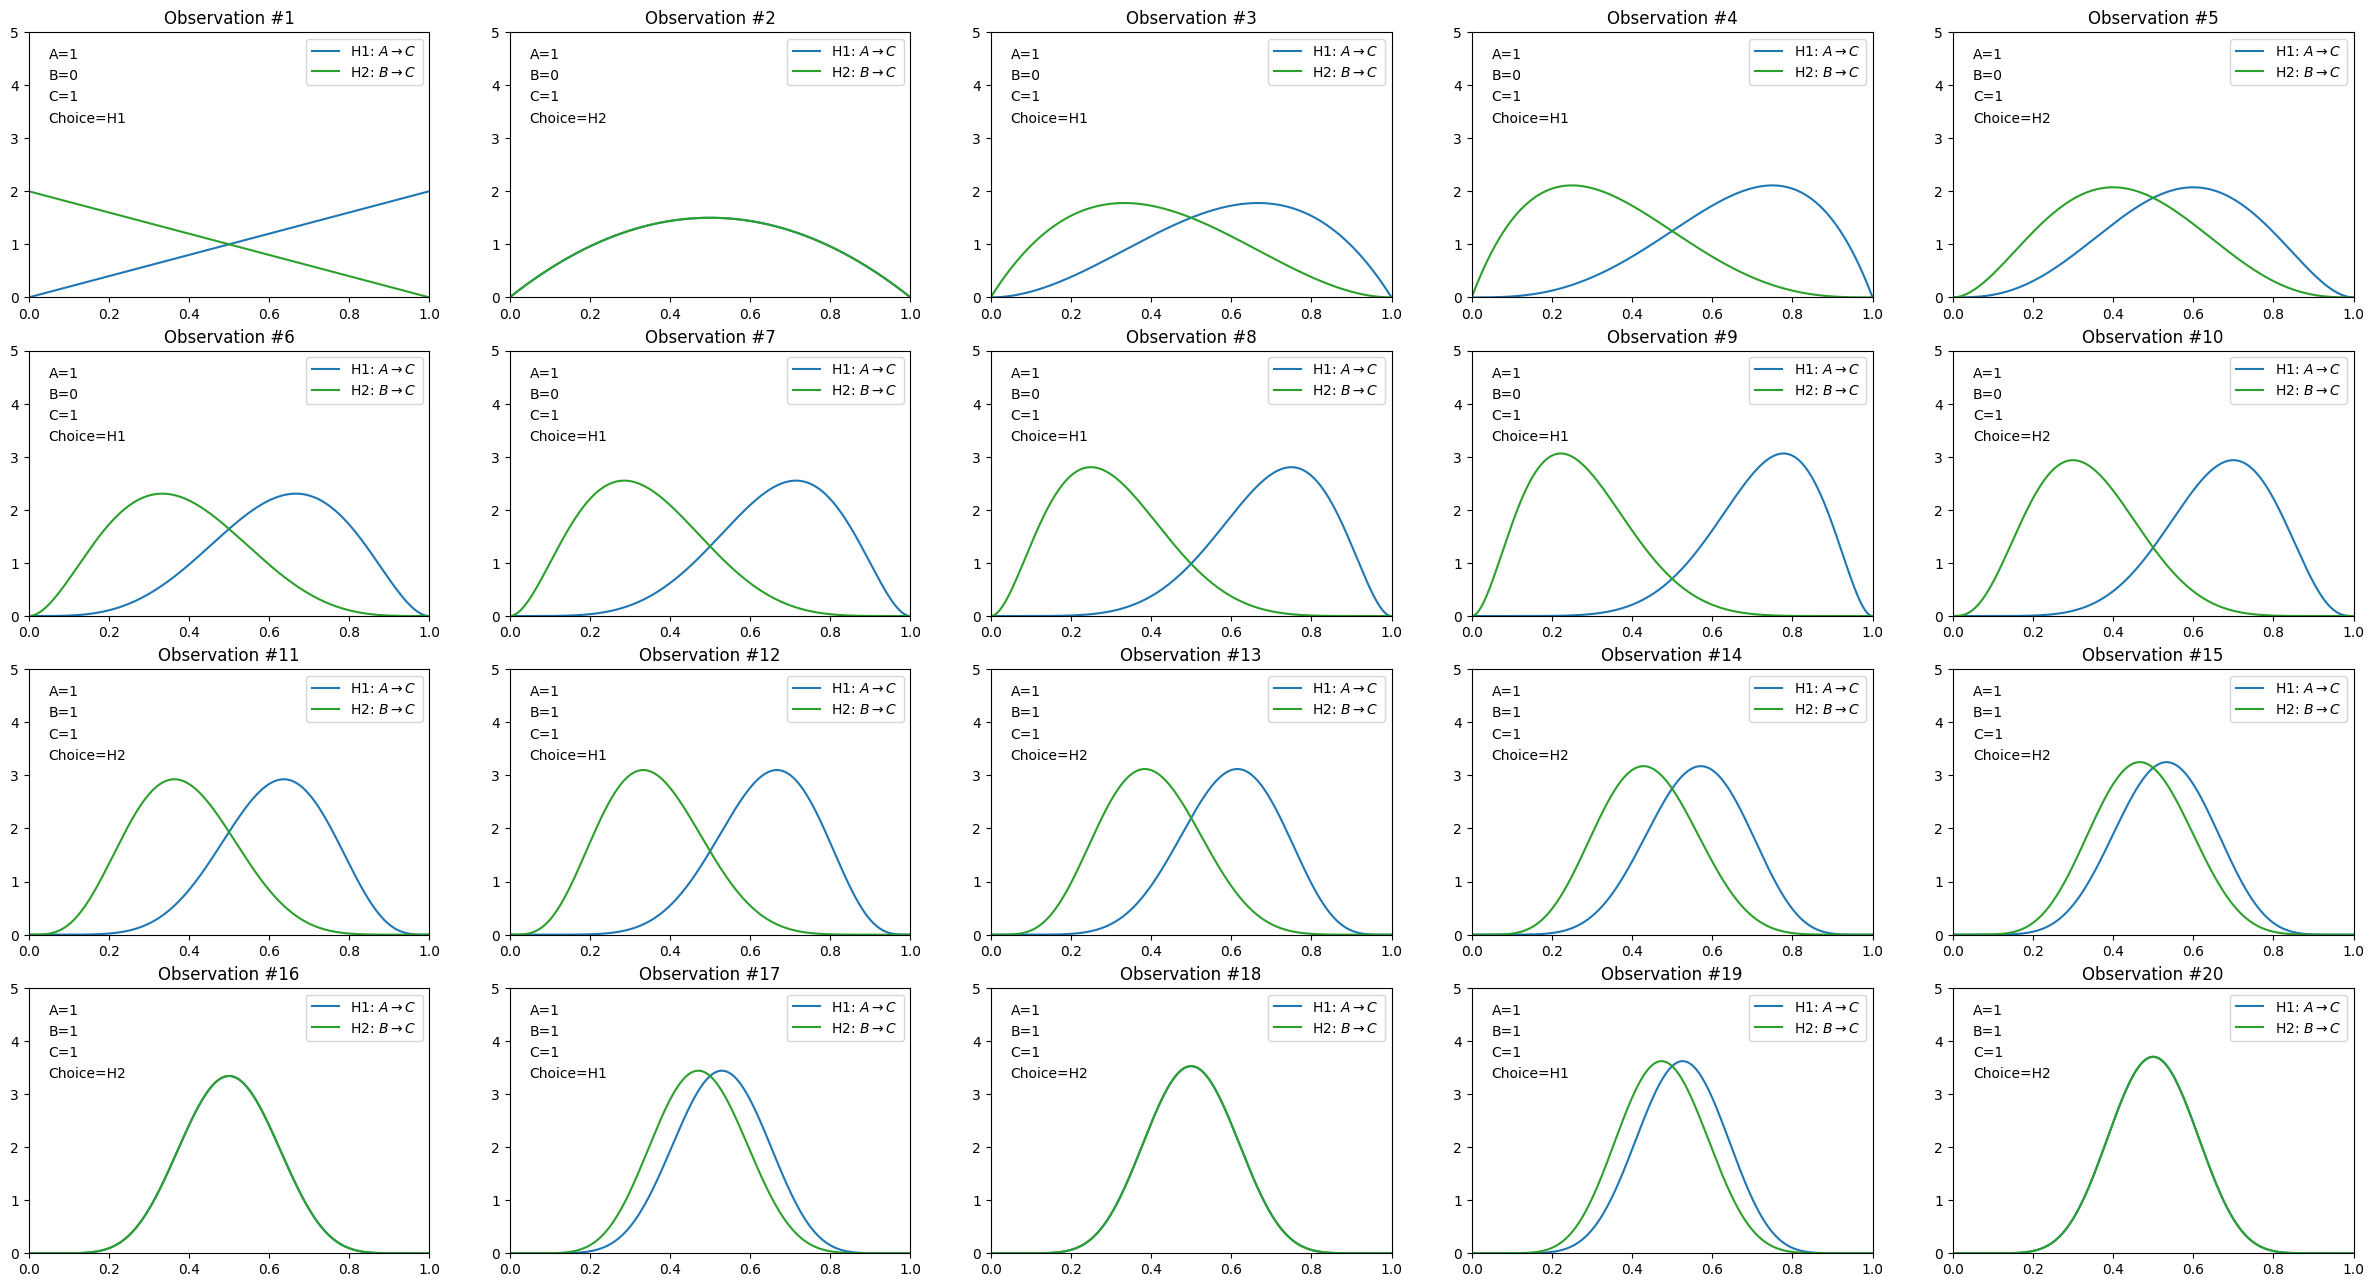

In [42]:
beta_, count = simple_competition(data)

In [61]:
def simple_competition_equiv(data, alpha=20):
    plt.figure(figsize=(30,20))
    # H1 : A <=> C : non-A ou C
    H1 = ((0,0,0), (0,1,0),  (1,0,1), (1,1,1)) 
    # H2 : B <=> C : non B ou C
    H2 = ((0,0,0), (1,0,0),  (0,1,1), (1,1,1)) 
    beta_ = {'H1':[1,1], 'H2':[1,1]}
    count = {'H1':0, 'H2':0}
    mem_choice = []
    lik = {}
    dir = {}
    for i, obs in enumerate(data):
        n = i + 1
        ax = plt.subplot(5,5,i+1)
        lik['H1'] = int(tuple(obs) in H1)
        lik['H2'] = int(tuple(obs) in H2)
        #print(lik['H0'], lik['H1'], lik['H2'])
        dir['H1'] = (count['H1']+ alpha/2) / (n + alpha)
        dir['H2'] = (count['H2']+ alpha/2) / (n + alpha)
        z = lik['H1'] * dir['H1'] +  lik['H2'] * dir['H2']
        p = ((lik['H1'] * dir['H1']) / z,
             (lik['H2'] * dir['H2']) / z)
        choice = np.random.choice(['H1','H2'], p=p)
        count[choice] += 1
        print(p, choice)
        beta_['H1'][int(choice=='H1')] += 1
        beta_['H2'][int(choice=='H2')] += 1
        print(beta_)
        pdf_H1 = beta.pdf(x, beta_['H1'][1], beta_['H1'][0])
        pdf_H2 = beta.pdf(x, beta_['H2'][1], beta_['H2'][0])
        ax.plot(x, pdf_H1, label=r'H1: $A \leftrightarrow C$', color='tab:blue')
        ax.plot(x, pdf_H2, label=r'H2: $B \leftrightarrow C$', color='tab:green')
        #overlap_surface = np.minimum(pdf_H0, pdf_H1)
        #overlap_prob = np.trapz(np.minimum(pdf_H0, pdf_H1), x)
        #ax.fill_between(x, np.zeros_like(overlap_surface), overlap_surface, color='tab:red', alpha=.2)
        ax.set_title(f'Observation #{i+1}')#, overlap={overlap_prob:.2f}')
        ax.text(0.05,4.5,f'A={obs[0]}')
        ax.text(0.05,4.1,f'B={obs[1]}')
        ax.text(0.05,3.7,f'C={obs[2]}')
        ax.text(0.05,3.3,f'Choice={choice}')
        ax.set_ylim(0,5)
        ax.set_xlim(0,1)
        plt.legend(loc=1)
    return beta_, count

In [62]:
data

[(1, 1, 1),
 (1, 1, 1),
 (1, 1, 1),
 (1, 1, 1),
 (1, 1, 1),
 (1, 1, 1),
 (1, 1, 1),
 (1, 1, 1),
 (1, 1, 1),
 (1, 1, 1),
 (1, 0, 0),
 (1, 0, 0),
 (1, 0, 0),
 (1, 0, 0),
 (1, 0, 0),
 (1, 0, 0),
 (1, 0, 0),
 (1, 0, 0),
 (1, 0, 0),
 (1, 0, 0)]

(0.5, 0.5) H1
{'H1': [1, 2], 'H2': [2, 1]}
(0.5238095238095238, 0.47619047619047616) H1
{'H1': [1, 3], 'H2': [3, 1]}
(0.5454545454545454, 0.45454545454545453) H2
{'H1': [2, 3], 'H2': [3, 2]}
(0.5217391304347826, 0.4782608695652174) H1
{'H1': [2, 4], 'H2': [4, 2]}
(0.5416666666666667, 0.45833333333333337) H1
{'H1': [2, 5], 'H2': [5, 2]}
(0.56, 0.44000000000000006) H1
{'H1': [2, 6], 'H2': [6, 2]}
(0.5769230769230769, 0.423076923076923) H1
{'H1': [2, 7], 'H2': [7, 2]}
(0.5925925925925927, 0.40740740740740744) H1
{'H1': [2, 8], 'H2': [8, 2]}
(0.6071428571428571, 0.39285714285714285) H2
{'H1': [3, 8], 'H2': [8, 3]}
(0.5862068965517241, 0.41379310344827586) H1
{'H1': [3, 9], 'H2': [9, 3]}
(0.0, 1.0) H2
{'H1': [4, 9], 'H2': [9, 4]}
(0.0, 1.0) H2
{'H1': [5, 9], 'H2': [9, 5]}
(0.0, 1.0) H2
{'H1': [6, 9], 'H2': [9, 6]}
(0.0, 1.0) H2
{'H1': [7, 9], 'H2': [9, 7]}
(0.0, 1.0) H2
{'H1': [8, 9], 'H2': [9, 8]}
(0.0, 1.0) H2
{'H1': [9, 9], 'H2': [9, 9]}
(0.0, 1.0) H2
{'H1': [10, 9], 'H2': [9, 10]}
(0.0,

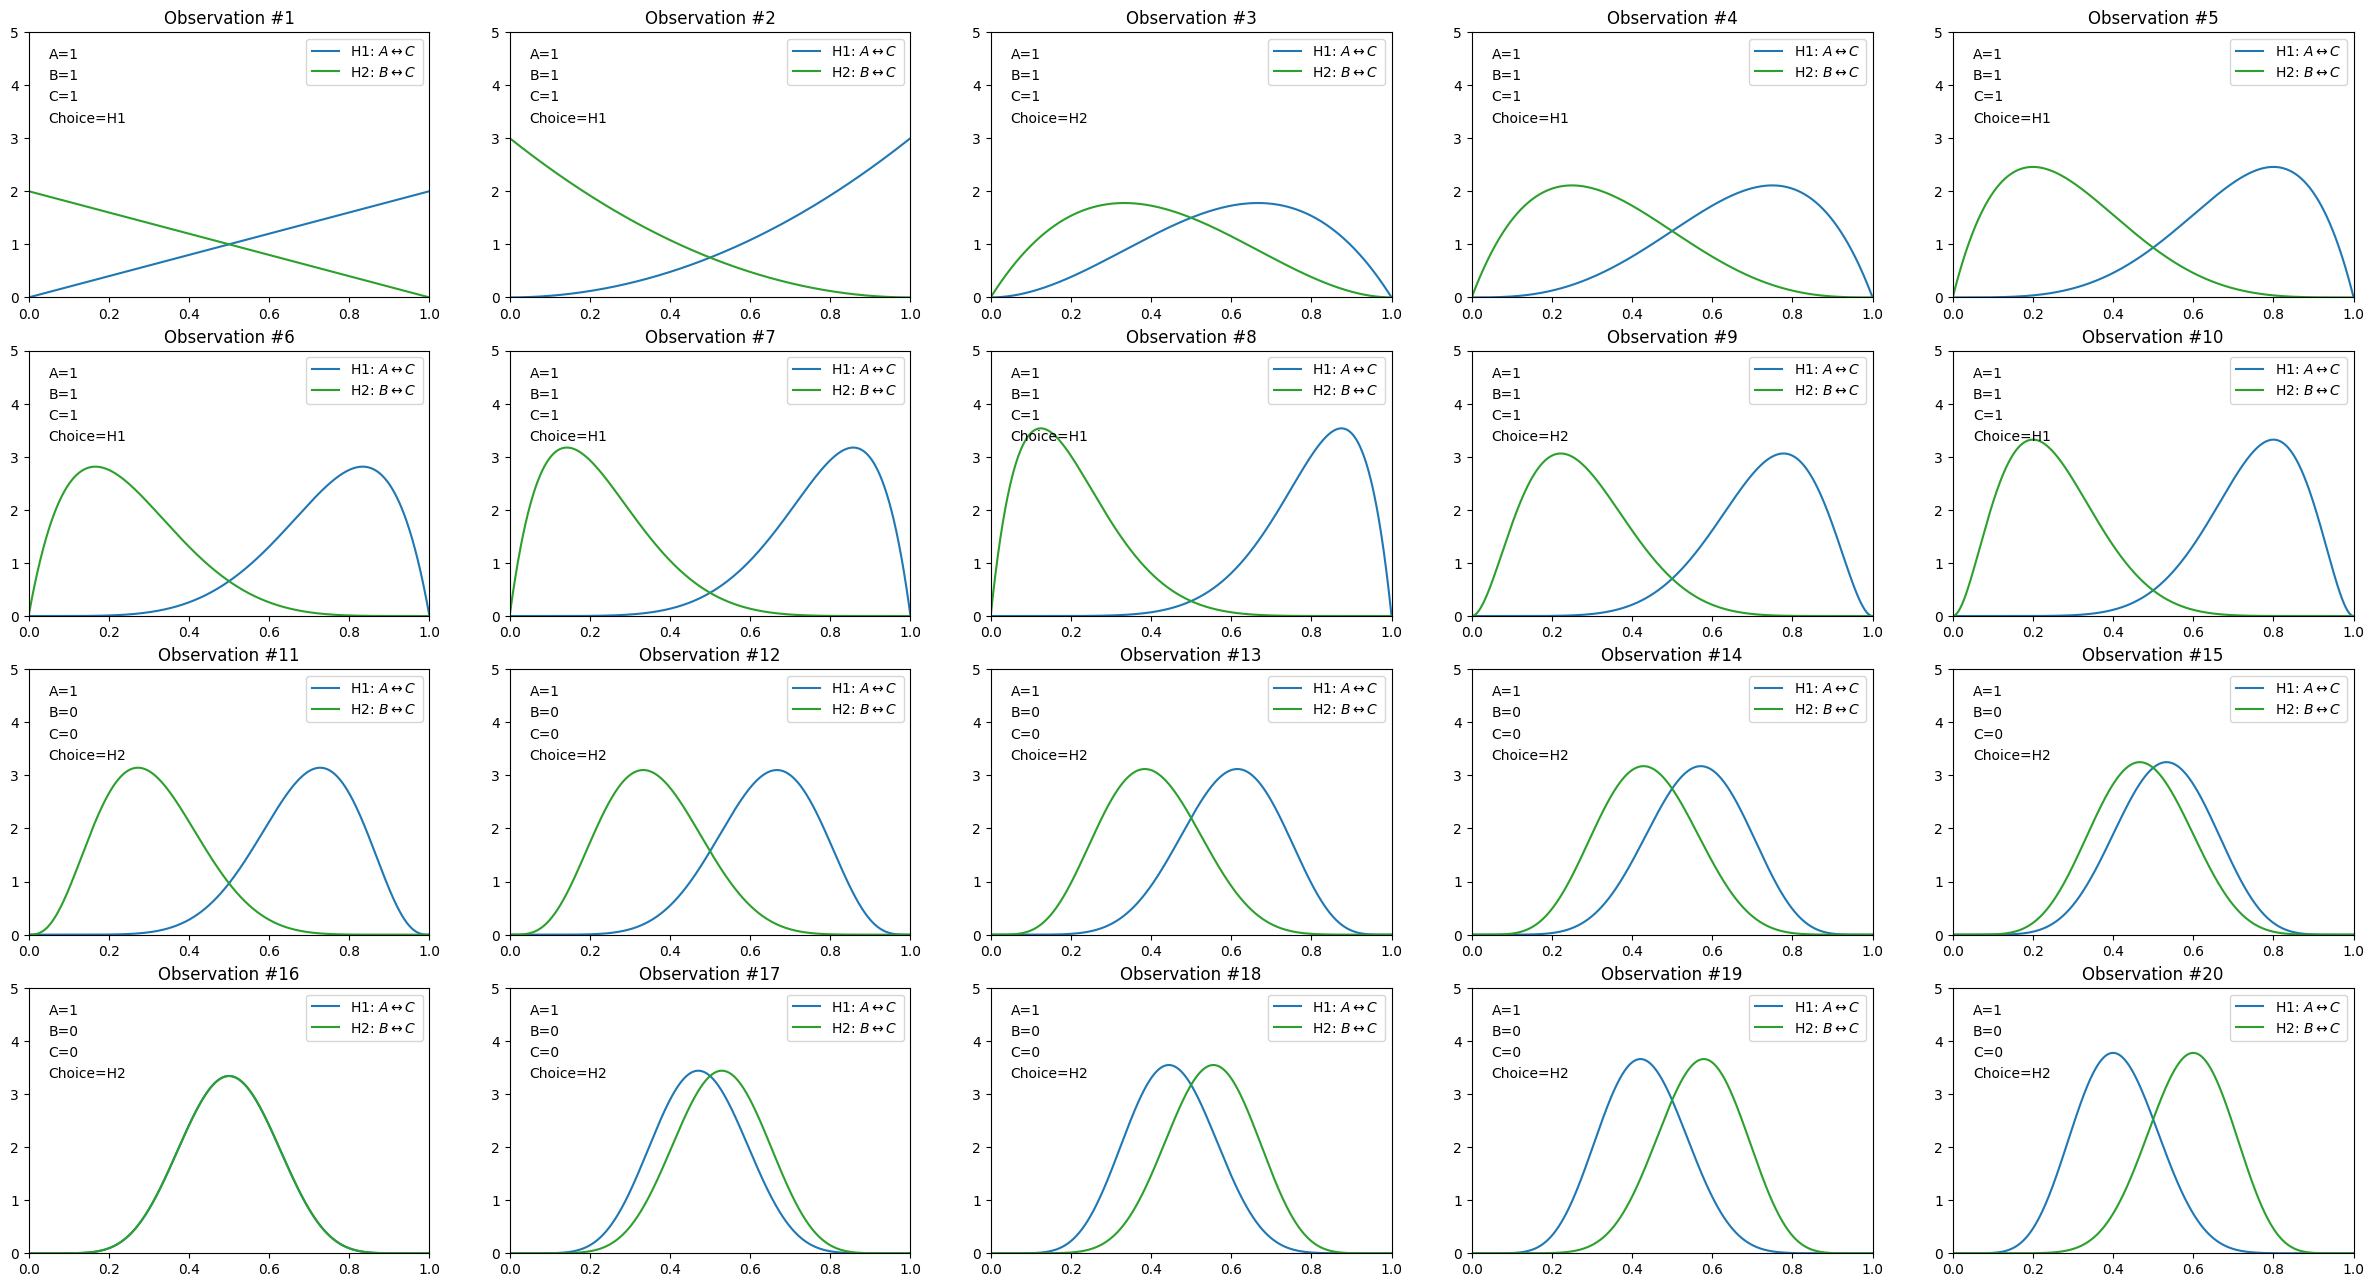

In [63]:
beta_, count = simple_competition_equiv(data)

In [59]:
beta_

{'H1': [18, 4], 'H2': [4, 18]}

In [60]:
p = [0.2,0.3,0.5]

In [88]:
beta_['H0'][0], beta_['H0'][1]

(15, 2)

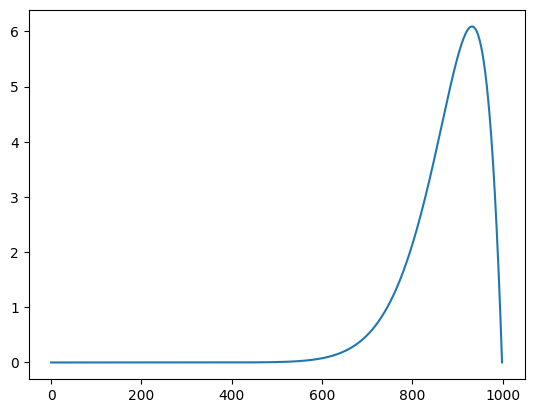

In [89]:
plt.plot(pdf_H0)

In [90]:
x

array([0.        , 0.001001  , 0.002002  , 0.003003  , 0.004004  ,
       0.00500501, 0.00600601, 0.00700701, 0.00800801, 0.00900901,
       0.01001001, 0.01101101, 0.01201201, 0.01301301, 0.01401401,
       0.01501502, 0.01601602, 0.01701702, 0.01801802, 0.01901902,
       0.02002002, 0.02102102, 0.02202202, 0.02302302, 0.02402402,
       0.02502503, 0.02602603, 0.02702703, 0.02802803, 0.02902903,
       0.03003003, 0.03103103, 0.03203203, 0.03303303, 0.03403403,
       0.03503504, 0.03603604, 0.03703704, 0.03803804, 0.03903904,
       0.04004004, 0.04104104, 0.04204204, 0.04304304, 0.04404404,
       0.04504505, 0.04604605, 0.04704705, 0.04804805, 0.04904905,
       0.05005005, 0.05105105, 0.05205205, 0.05305305, 0.05405405,
       0.05505506, 0.05605606, 0.05705706, 0.05805806, 0.05905906,
       0.06006006, 0.06106106, 0.06206206, 0.06306306, 0.06406406,
       0.06506507, 0.06606607, 0.06706707, 0.06806807, 0.06906907,
       0.07007007, 0.07107107, 0.07207207, 0.07307307, 0.07407